# EDA

In [104]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [105]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
df.shape

(200, 5)

In [107]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [108]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

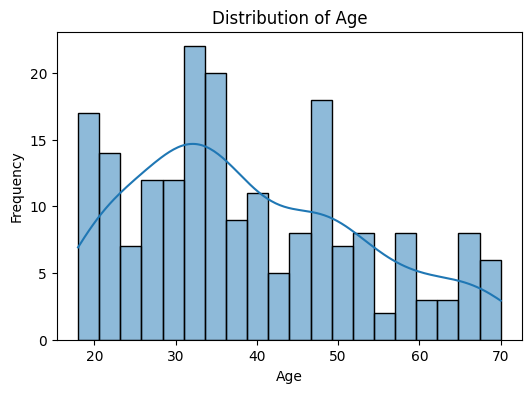

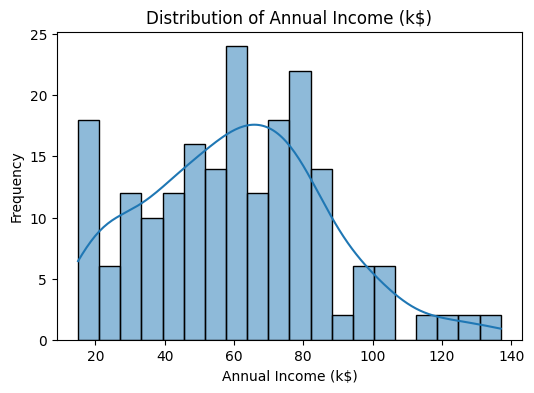

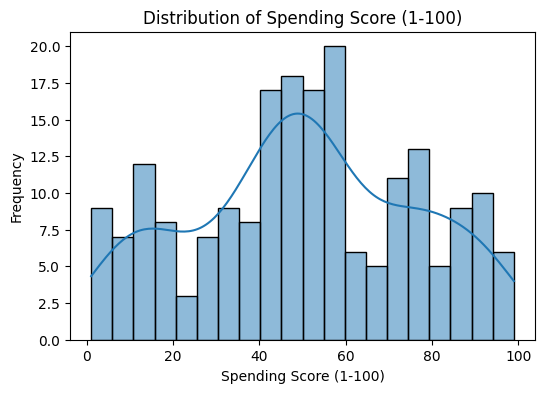

In [109]:
# Visualize the distribution of features using histograms
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Data Preperations for Clustering

In [110]:
# Feature scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Use scaled data and input into a new df
scaled_df = pd.DataFrame(scaled_df, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

print(scaled_df.head())

   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


# Implement K-means clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

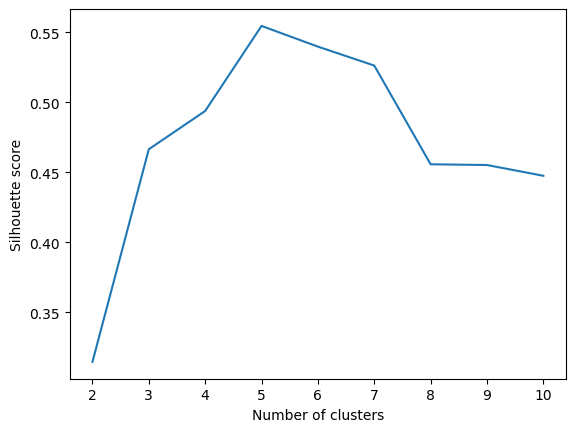

In [111]:
# Using silhouette method and determine optimal number of clusters to use in the model
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

# visualize silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [112]:
# Using previous silhouette scores to indicate optimal number of clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

# Train KMeans model using optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [113]:
# Obtain the cluster assignments for each data point
cluster_labels = kmeans.predict(scaled_df)
scaled_df['Cluster'] = cluster_labels

# Visualizing & Analyzing Clusters

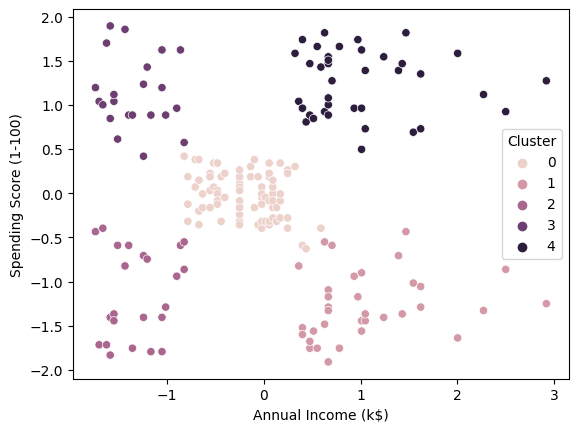

In [114]:
# Visualized scatterplot to see clusters and its position across the "spending score" and "annual income"
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=scaled_df)
plt.show()

# Report & Findings

In [115]:
cluster_means = scaled_df.groupby('Cluster').mean()
print(cluster_means)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 -0.200913               -0.026456
1                  1.055003               -1.284439
2                 -1.307519               -1.136965
3                 -1.329545                1.132178
4                  0.991583                1.239503


**Overview of clusters**

Cluster 0: This cluster placed right at the center of the table having both a medium annual income and spending score compared to the 4 other clusters.

Cluster 1: This cluster scored low on spending and high on income. Customers in this group may be conservative or thrifty spenders who put their financial security and savings before discretionary expenditure.

Cluster 2: The spending and income scores for this cluster are both low. Customers in this group may be conservative or customers with limited budgets who place more importance on necessity and practicality.

Cluster 3: This cluster has a high spending score and a low income score. Customers in this group may be youthful or carefree customers who place a higher value on right now than than long-term financial planning or savings.

Cluster 4: Both income and the spending score for this cluster are high. Customers in this cluster can be high-end or wealthy consumers who value luxury and premium goods over affordability and value.

**A : Description of Data:** 'Mall_Customers.csv' contains information on customers of a mall. 
- CustomerID (unique ID for each customer) 
- Gender (Male or Female)
- Age (age of the customer)
- Annual Income (k$) (annual income of the customer in thousands of dollars)
- Spending Score (1-100) (a score assigned by the mall based on customer behavior and spending nature).

**B. Data Preprocessing:**
- To begin the  data for preperation and to ensure all features were scaled to the same value,  StandardScaler was used from scikit-learn library's. 'Annual Income (k$)' and 'Spending Score (1-100)' were the two features that were specifically chosen, then a new DataFrame was created with just these two features.

**C. Steps of determining optimal number of clusters used:**
-  The optimal amount of clusters was chosen using the Silhouette Method. The number of clusters with the highest Silhouette score was chosen as the number of clusters which was 5.

**D. Description of clusters and characteristics:**
- The Silhouette Method's recommended number of clusters was used to  finally perform K-Means clustering on features 'Annual Income (k$)' and 'Spending Score (1-100)'. The characteristics of these clusters can be found above in "Overview of clusters"

**E. Insights and Recommendations:**
- Based on the Cluster analysis, we were able to determine the seperate customer segments according to their income and spending habbits. Management can utilize this data to customize marketing and promotion plans for each cluster. For instance:
  - Customers in Cluster 0 might respond favorably to promotions and discounts that focus on value. 
  - whereas consumers in Cluster 4 might be more likely to buy luxury or high-end goods and would rather care more about quality that value.
  - Customers in Cluster 1 who also have a higher income but lower spending scores should be incentivized more and encouraged to come and spend more through targeted ads and promotions.